# Assignment 1

Two color images have been provided to you as sample inputs. You may also test on other input images of your choice.

In [1]:
import sys
import cv2
import matplotlib.pyplot as plt
import numpy as np

from collections import Counter

print(sys.version) # Expected Python version is 3+
print(cv2.__version__) # Expected OpenCV version is 3.*

3.6.9 |Anaconda, Inc.| (default, Jul 30 2019, 13:42:17) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
3.4.2


In [2]:
def preview(img):
    shape = img.shape
    if len(shape) == 2: # gray-scale
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

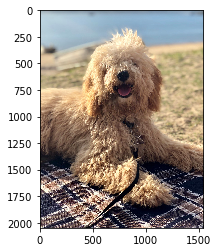

In [3]:
# Read two images in
img1 = cv2.imread('dog.jpg', 1)

# OpenCV distort the color space from original RGB to BGR
# So we have to change the color space into normal RGB
preview_img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)

plt.imshow(preview_img1) # display the first image

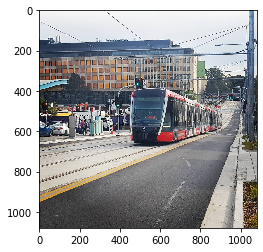

In [4]:
img2 = cv2.imread('light_rail.jpg', 1)

preview_img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.imshow(preview_img2) # display the second image

## Task 1
Starting with an input color image, you should combine the three color-bands into one band using the following equation:

$$ I(x,y) = 0.299 * r(x,y) + 0.587 * g(x,y) + 0.114 * b(x,y) $$

where $r, g$ and $b$ are color-bands of image $I$.

You will go through the image pixel by pixel and perform this operation on each pixel. The resulting image $I$ will contain only one combined band, i.e., it is a gray-level image.

In [5]:
# Following operation will be performed on this very image
choice = 1
if choice == 0:
    A = img1 # dog.jpg
    NAME = '_dog_'
else:
    A = img2 # light_rail.jpg
    NAME = '_light_rail_'

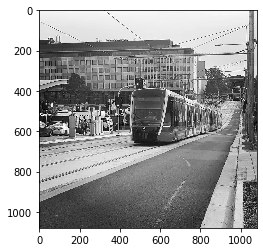

In [6]:
row, col, _ = A.shape
I = np.zeros([row, col])

def thresholding(img):
    # OpenCV image is stored in BGR order
    return int(0.299 * img[2] + 0.587 * img[1] + 0.114 * img[0])

for r in range(0, row):
    for c in range(0, col):
        I[r,c] = thresholding(A[r,c])
        
cv2.imwrite('task1'+NAME+'.jpg', I)
plt.imshow(I, cmap='gray')

## Task 2

Once you obtain the combined single band image I, the next task is to perform the following sequence of operations on I. The goal is to find the most frequent local pixel value in a neighbourhood (including the current pixel) to create another image J. 

To create image J, first make a copy of image I called J.

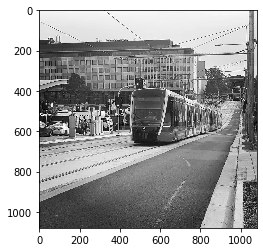

In [7]:
J = I.copy()

preview(J)

You will:

* first define an appropriate neighbourhood (window) around a pixel in $I$
* compute the intensity histogram for pixels in the neighbourhood around each pixel
    * pick the most frequent pixel value in the neighbourhood using the histogram, and replace the central pixel in the corresponding window in J with the most frequent local pixel value for that window
    * repeat the above for every pixel in I

> Try at least 3 different window size in Task 2

In [8]:
# Define window size here for Task 2 & 3

WINDOW_SIZE = 7
diff = int(WINDOW_SIZE/2)

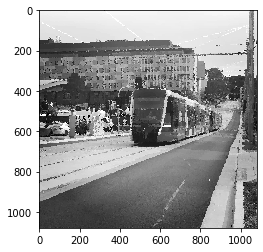

In [9]:
def most_frequent_from_neighbour(img, centre):
    row, col = centre
    neighbour = np.empty([WINDOW_SIZE, WINDOW_SIZE, 3])
    for r in range(WINDOW_SIZE):
        for c in range(WINDOW_SIZE):
            neighbour[r,c] = img[row+r-diff, col+c-diff]
    
    counter = Counter(neighbour.ravel())
    val, _ = counter.most_common(1)[0] # choice policy is arbitrary chosen
    
    return val

row, col = J.shape

for r in range(diff, row-diff):
    for c in range(diff, col-diff):
        J[r,c] = most_frequent_from_neighbour(I, (r,c))

cv2.imwrite('task2_'+NAME+str(WINDOW_SIZE)+'.jpg', J)
preview(J)

## Task 3

Using $J$ from Task 2, you will construct the final 'oil painting effect' image. To do this, you will

* make a copy of the original image $A$ (and let us call it image $B$)
* for each pixel (x,y) in the image $J$, in the local neighbourhood of pixel (x,y) defined in Task 2
    * find all pixels in $J$ which have the same value of $J$(x,y)
    * get the corresponding color intensities of those pixels in image $B$
    * calculate the average intensities of those pixels in each band
    * then replace $B$(x,y) with the average intensities in each corresponding band
    
Try the same window sizes here as in Task 2, to experiment with the art effects produced. The resulting image $B$ for different window sizes is the output for Task 3 and should be included in the report.

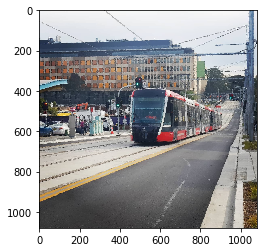

In [10]:
B = A.copy()

row, col = J.shape

def neighbours(img, centre):
    row, col = centre
    neighbour = np.empty([WINDOW_SIZE, WINDOW_SIZE, 3])
    mimic = np.zeros(3)
    counter = 0
    for r in range(WINDOW_SIZE):
        for c in range(WINDOW_SIZE):
            i, j = row+r-diff, col+c-diff
#             print(img[i,j], img[centre])
            if np.array_equal(img[i,j], img[centre]):
                mimic = np.add(mimic, B[i,j])
                counter+=1
    return np.divide(mimic, counter)

for r in range(diff, row-diff):
    for c in range(diff, col-diff):
        B[r,c] = neighbours(J, (r,c))

cv2.imwrite('task3_'+NAME+str(WINDOW_SIZE)+'.jpg', B)
preview(B)